# Graphs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


C:\Users\mrbon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

In [3]:
# Read DataFrame
pkls_path = pkls = r'D:\Tesis\ResEleCon-MX\pickles'
ener = pd.read_pickle(pkls_path + '/total_energy.pkl')

Group households by UPM: sum and mean

In [78]:
ener_ageb = ener.loc[~ener['CVE_ZM'].isnull(), ['CVE_ZM','upm','ing_cor','fuel','gas','kwh','total_ener']].groupby('upm', as_index=False).sum(min_count=1)
ener_upm_mean = ener.loc[~ener['CVE_ZM'].isnull(), ['CVE_ZM','upm','ing_cor','fuel','gas','kwh','total_ener']].groupby('upm', as_index=False).mean()

ener_ordered = ener_ageb.sort_values(by=['total_ener'], ignore_index=True)

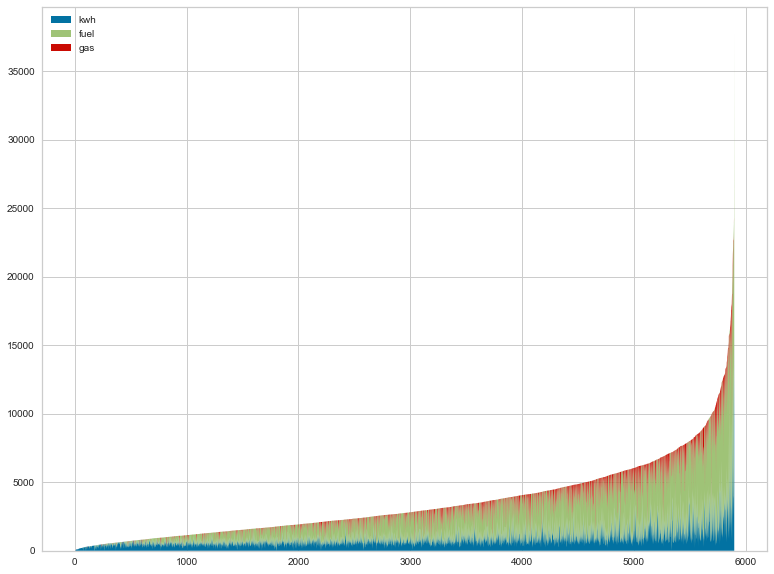

In [43]:
# Data
x=ener_ordered.index
y=[ener_ordered.kwh.to_list(),ener_ordered.fuel.to_list(),ener_ordered.gas.to_list()]

# Plot
fig, ax = plt.subplots(figsize=(13,10))
ax.stackplot(x,y, labels=['kwh','fuel','gas'])
plt.legend(loc='upper left')
plt.show()

## Deciles

In [87]:
ener_upm_mean['kwh_d'] = pd.qcut(ener_upm_mean['kwh'], 10, labels=False)
ener_upm_mean['fuel_d'] = pd.qcut(ener_upm_mean['fuel'], 10, labels=False)
ener_upm_mean['gas_d'] = pd.qcut(ener_upm_mean['gas'], 10, labels=False)

In [81]:
ener_ageb['kwh_d'] = pd.qcut(ener_ageb['kwh'], 10, labels=False)
ener_ageb['fuel_d'] = pd.qcut(ener_ageb['fuel'], 10, labels=False)
ener_ageb['gas_d'] = pd.qcut(ener_ageb['gas'], 10, labels=False)

In [82]:
ener_ageb.describe()

,upm,CVE_ZM,ing_cor,fuel,gas,kwh,total_ener,kwh_d,fuel_d,gas_d
count,5897.000000,5897.000000,5.897000e+03,5355.000000,5552.000000,5875.000000,5896.000000,5875.000000,5355.000000,5552.000000
mean,4106.092929,78.247963,3.019015e+05,2428.633670,325.542053,1029.410574,3538.081734,4.499915,4.484034,4.497298
std,2408.136152,73.872401,2.244631e+05,2149.111043,718.363827,993.882946,2955.619005,2.872881,2.891946,2.875422
min,1.000000,2.020000,1.433151e+04,44.131948,0.027210,27.177458,0.358023,0.000000,0.000000,0.000000
25%,2130.000000,30.120000,1.812054e+05,951.881123,0.651368,513.855630,1517.840324,2.000000,2.000000,2.000000
50%,4083.000000,60.060000,2.494352e+05,1851.834778,1.207206,734.455691,2762.762787,4.000000,4.000000,4.500000
75%,6125.000000,110.050000,3.437963e+05,3236.395817,206.069854,1183.420898,4738.585856,7.000000,7.000000,7.000000
max,8351.000000,800.250000,4.033086e+06,20263.811840,10259.643937,17505.673895,37773.374551,9.000000,9.000000,9.000000


### By sum

In [83]:
ener_reg = ener_ageb[(ener_ageb.kwh_d.notna()) & (ener_ageb.fuel_d.notna()) & (ener_ageb.gas_d.notna())]

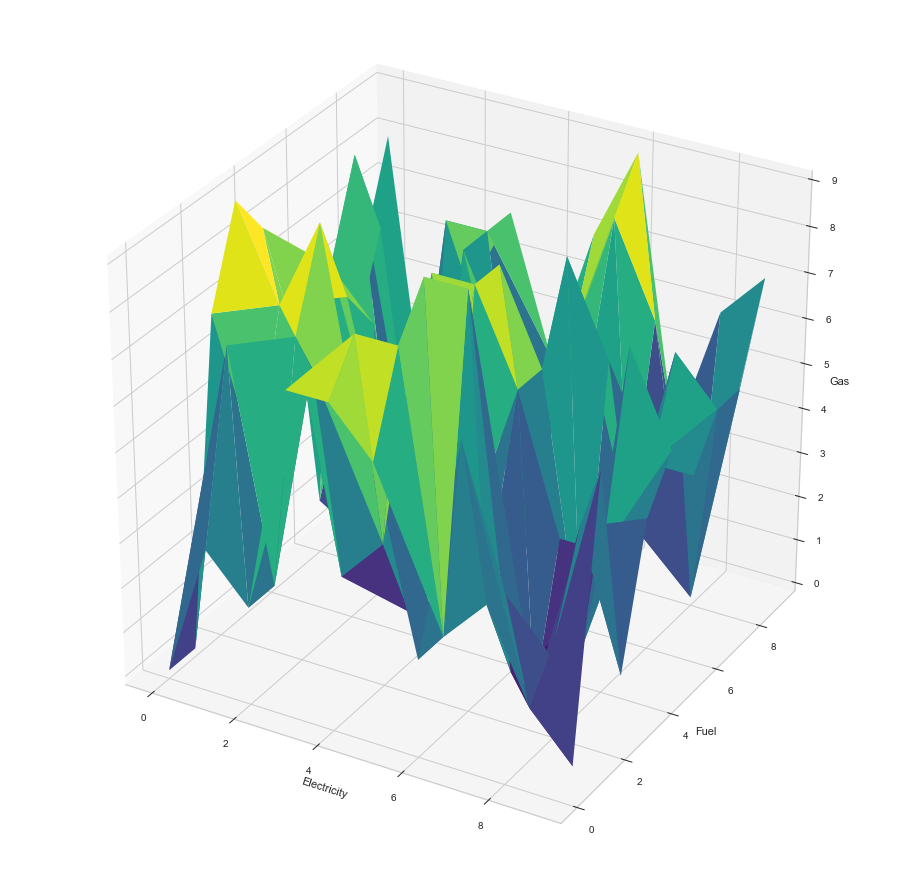

In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')

ax.plot_trisurf(ener_reg['kwh_d'], ener_reg['fuel_d'], ener_reg['gas_d'], linewidth=0.2, antialiased=True, cmap='viridis', edgecolor='none')

ax.set_xlabel('Electricity')
ax.set_ylabel('Fuel')
ax.set_zlabel('Gas')

plt.show()

### By mean

In [89]:
ener_reg1 = ener_upm_mean[(ener_upm_mean.kwh_d.notna()) & (ener_upm_mean.fuel_d.notna()) & (ener_upm_mean.gas_d.notna())]

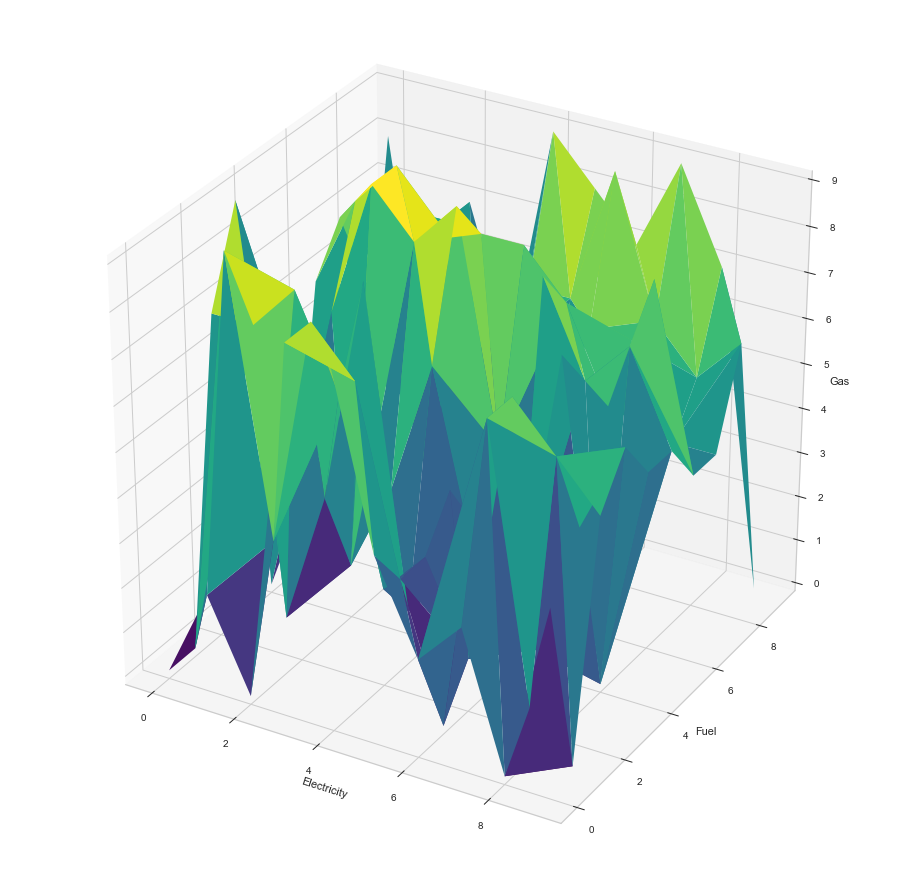

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')

ax.plot_trisurf(ener_reg1['kwh_d'], ener_reg1['fuel_d'], ener_reg1['gas_d'], linewidth=0.2, antialiased=True, cmap='viridis', edgecolor='none')

ax.set_xlabel('Electricity')
ax.set_ylabel('Fuel')
ax.set_zlabel('Gas')

plt.show()

### By sum

In [93]:
ener_ageb['income_d'] = pd.qcut(ener_ageb['ing_cor'], 10, labels=False)

Text(0.049826165457624, -0.06420974047744715, 'Fuel')

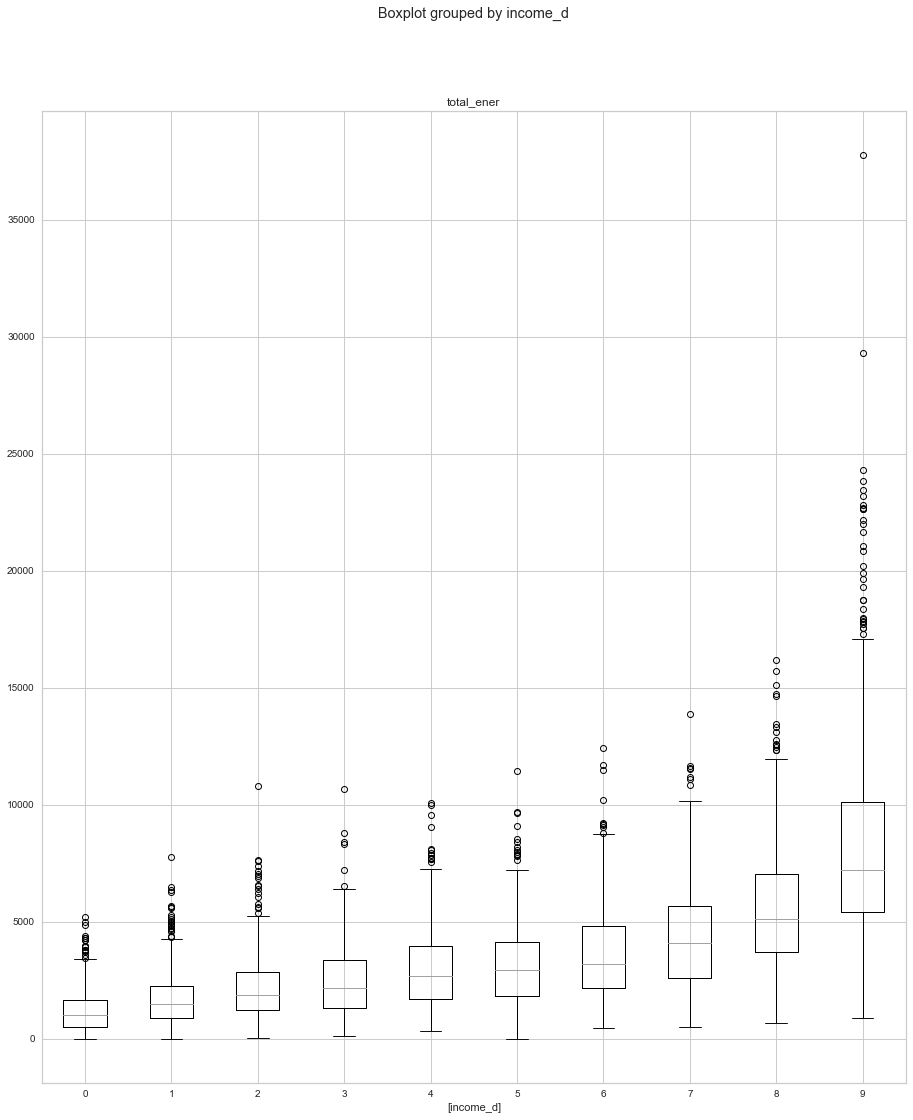

In [94]:
ener_ageb.boxplot(column=['total_ener'], by=['income_d'], figsize=(15,18))
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

### By mean

In [91]:
ener_upm_mean['income_d'] = pd.qcut(ener_upm_mean['ing_cor'], 10, labels=False)

Text(0.049826165457624, -0.06420974047744715, 'Fuel')

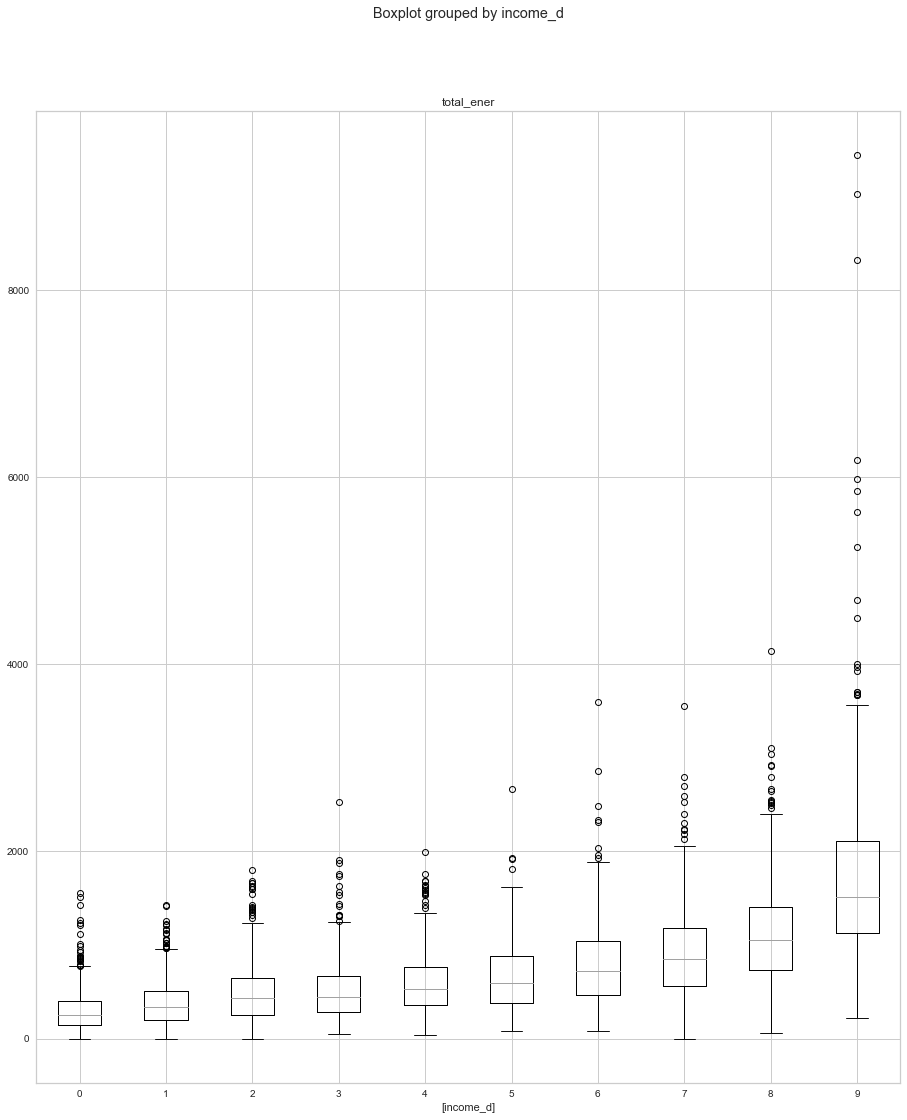

In [92]:
ener_upm_mean.boxplot(column=['total_ener'], by=['income_d'], figsize=(15,18))
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

## Clusters
### By sum

In [53]:
def silhouette_visualizer(range_n_clusters, X):
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

In [51]:
X = ener_ageb[['fuel','gas','kwh']]

In [52]:
names = ['fuel','gas','kwh']
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(X)
X = pd.DataFrame(df_mm, columns=names)

For n_clusters = 2 The average silhouette_score is : 0.525743945839516
For n_clusters = 3 The average silhouette_score is : 0.5136262913326713
For n_clusters = 4 The average silhouette_score is : 0.46950752424770376
For n_clusters = 5 The average silhouette_score is : 0.38774246329380146
For n_clusters = 6 The average silhouette_score is : 0.3990378142130298
For n_clusters = 7 The average silhouette_score is : 0.4008107228659799
For n_clusters = 8 The average silhouette_score is : 0.3987034964378117


C:\Users\mrbon\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1B0BFAB88>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

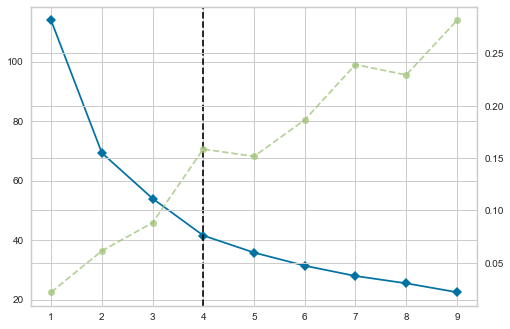

In [55]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
silhouette_visualizer(range_n_clusters, X)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X)        # Fit the data to the visualizer

In [56]:
n = 6
kmeans = KMeans(n_clusters=n)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [57]:
clus_ener = ener_ageb.copy()
clus_ener['cluster'] = labels

In [58]:
clus_ener

,upm,CVE_ZM,ing_cor,fuel,gas,kwh,total_ener,kwh_d,fuel_d,gas_d,income_d,cluster
0,1,5.05,800178.97,3438.161425,1777.706028,675.166962,5891.034416,5.0,7.0,9.0,9,1
1,2,4.04,457578.56,4465.592880,1.302643,515.549704,4982.445228,4.0,4.0,NaN,8,4
2,3,4.04,258923.40,1789.535527,1041.667500,207.001334,3038.204361,3.0,4.0,7.0,5,1
3,4,5.05,297307.37,3617.148266,1473.098955,615.555019,5705.802240,4.0,6.0,8.0,6,1
4,5,5.05,223911.45,1808.573313,1.542455,482.542606,2292.658374,2.0,NaN,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5892,8319,192.06,496233.18,2405.656362,3.740795,610.353805,3019.750962,2.0,4.0,NaN,8,0
5893,8320,192.06,249793.76,2665.265504,0.415767,682.826301,3348.507573,4.0,NaN,9.0,5,0
5894,8321,192.06,781679.73,9505.253238,1.074069,691.055057,10197.382364,7.0,9.0,2.0,9,4
5895,8322,192.06,377253.97,4450.043634,1.512496,643.013490,5094.569620,3.0,5.0,NaN,8,4


Text(0.049826165457624, -0.06420974047744715, 'Fuel')

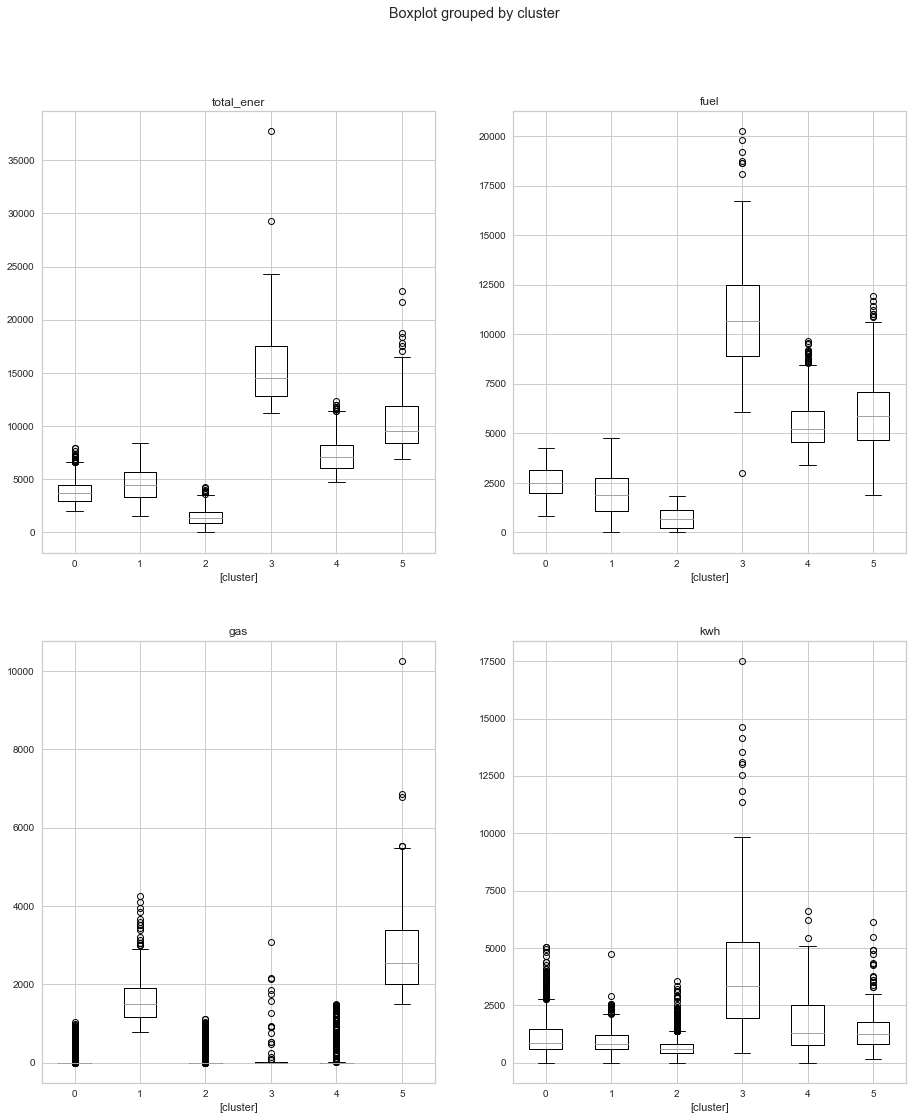

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,18))

clus_ener.boxplot(column=['total_ener'], by=['cluster'], ax=axes[0,0]) # figsize=(15,18)
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['fuel'], by=['cluster'],  ax=axes[0,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['gas'], by=['cluster'],  ax=axes[1,0])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['kwh'], by=['cluster'],  ax=axes[1,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

In [60]:
n = 4
kmeans = KMeans(n_clusters=n)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [61]:
clus_ener = ener_ageb.copy()
clus_ener['cluster'] = labels

In [62]:
clus_ener

,upm,CVE_ZM,ing_cor,fuel,gas,kwh,total_ener,kwh_d,fuel_d,gas_d,income_d,cluster
0,1,5.05,800178.97,3438.161425,1777.706028,675.166962,5891.034416,5.0,7.0,9.0,9,3
1,2,4.04,457578.56,4465.592880,1.302643,515.549704,4982.445228,4.0,4.0,NaN,8,2
2,3,4.04,258923.40,1789.535527,1041.667500,207.001334,3038.204361,3.0,4.0,7.0,5,0
3,4,5.05,297307.37,3617.148266,1473.098955,615.555019,5705.802240,4.0,6.0,8.0,6,3
4,5,5.05,223911.45,1808.573313,1.542455,482.542606,2292.658374,2.0,NaN,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5892,8319,192.06,496233.18,2405.656362,3.740795,610.353805,3019.750962,2.0,4.0,NaN,8,0
5893,8320,192.06,249793.76,2665.265504,0.415767,682.826301,3348.507573,4.0,NaN,9.0,5,2
5894,8321,192.06,781679.73,9505.253238,1.074069,691.055057,10197.382364,7.0,9.0,2.0,9,1
5895,8322,192.06,377253.97,4450.043634,1.512496,643.013490,5094.569620,3.0,5.0,NaN,8,2


Text(0.049826165457624, -0.06420974047744715, 'Fuel')

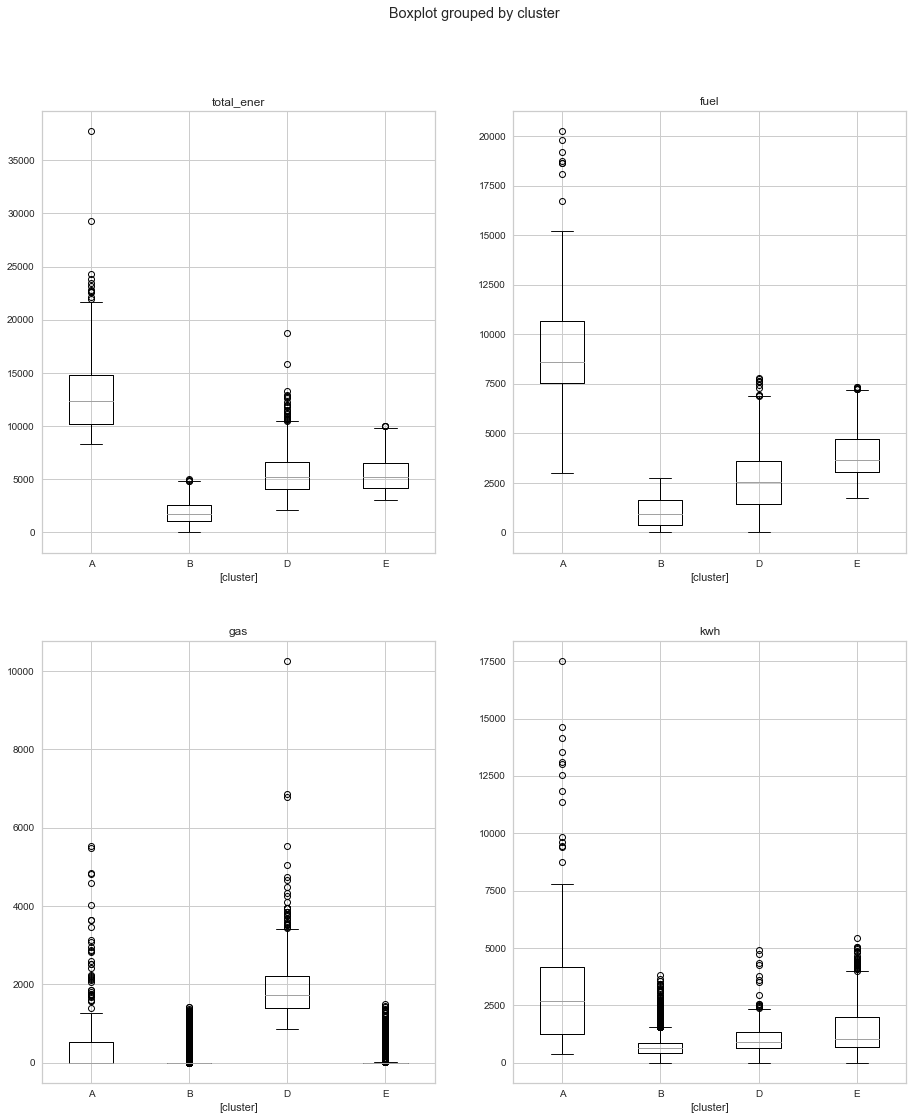

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,18))

clus_ener.boxplot(column=['total_ener'], by=['cluster'], ax=axes[0,0]) # figsize=(15,18)
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['fuel'], by=['cluster'],  ax=axes[0,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['gas'], by=['cluster'],  ax=axes[1,0])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['kwh'], by=['cluster'],  ax=axes[1,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

### By mean

In [113]:
X = ener_upm_mean[['fuel','gas','kwh']]
X = X.dropna()

In [114]:
names = ['fuel','gas','kwh']
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(X)
X = pd.DataFrame(df_mm, columns=names)

For n_clusters = 2 The average silhouette_score is : 0.509569765662249
For n_clusters = 3 The average silhouette_score is : 0.42390804988663305
For n_clusters = 4 The average silhouette_score is : 0.4313162306770114
For n_clusters = 5 The average silhouette_score is : 0.4169426185270653
For n_clusters = 6 The average silhouette_score is : 0.36124275873514694
For n_clusters = 7 The average silhouette_score is : 0.3608100291283535
For n_clusters = 8 The average silhouette_score is : 0.3389076608523073


C:\Users\mrbon\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1B7B7E208>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

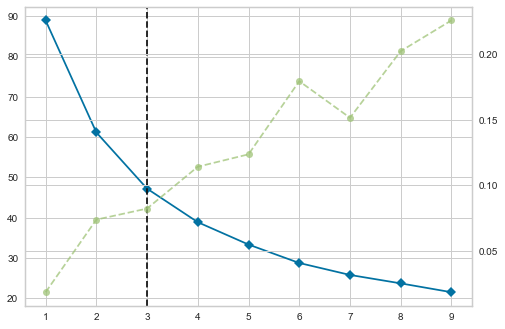

In [115]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
silhouette_visualizer(range_n_clusters, X)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X)        # Fit the data to the visualizer

In [116]:
n = 5
kmeans = KMeans(n_clusters=n)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [118]:
clus_ener = ener_upm_mean.dropna().copy()
clus_ener['cluster'] = labels

In [119]:
clus_ener

,upm,CVE_ZM,ing_cor,fuel,gas,kwh,total_ener,kwh_d,fuel_d,gas_d,income_d,cluster
0,1,1.01,160035.794000,859.540356,592.568676,135.033392,1178.206883,3.0,6.0,9.0,9,4
1,2,1.01,114394.640000,1488.530960,0.434214,128.887426,1245.611307,2.0,8.0,6.0,9,0
2,3,1.01,64730.850000,596.511842,520.833750,69.000445,759.551090,0.0,3.0,9.0,7,4
3,4,1.01,59461.474000,723.429653,368.274739,123.111004,1141.160448,2.0,4.0,9.0,6,4
4,5,1.01,44782.290000,602.857771,0.385614,96.508521,458.531675,0.0,3.0,5.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5892,8319,32.01,82705.530000,801.885454,0.748159,122.070761,503.291827,2.0,5.0,7.0,8,2
5893,8320,32.01,41632.293333,666.316376,0.415767,113.804384,558.084595,1.0,4.0,5.0,3,2
5894,8321,32.01,130279.955000,2376.313310,0.358023,115.175843,1699.563727,2.0,9.0,5.0,9,0
5895,8322,32.01,62875.661667,741.673939,0.302499,107.168915,849.094937,1.0,5.0,3.0,6,2


Text(0.049826165457624, -0.06420974047744715, 'Fuel')

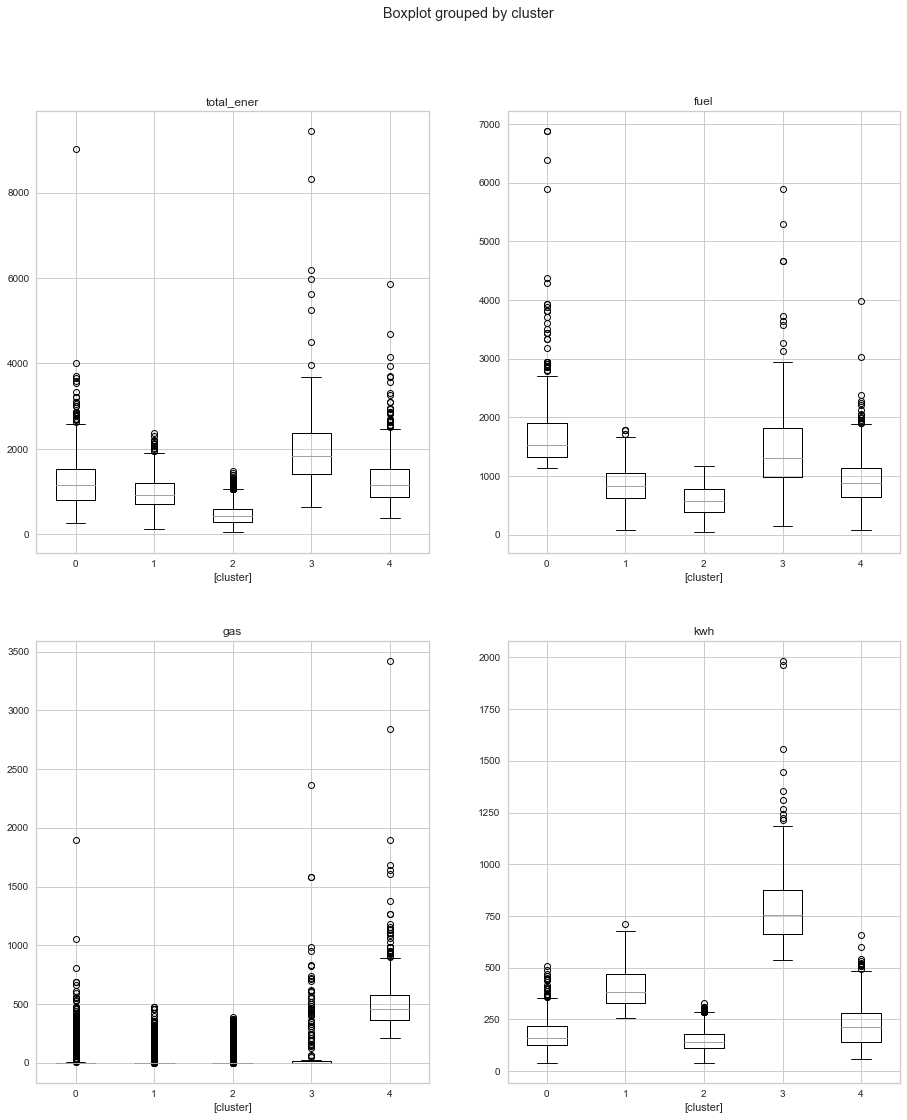

In [120]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,18))

clus_ener.boxplot(column=['total_ener'], by=['cluster'], ax=axes[0,0]) # figsize=(15,18)
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['fuel'], by=['cluster'],  ax=axes[0,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['gas'], by=['cluster'],  ax=axes[1,0])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['kwh'], by=['cluster'],  ax=axes[1,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')